In [9]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import cv2
import os
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from numpy import genfromtxt

In [10]:
#fname = '/Users/ckruse/Documents/GitHub/OldFaithful/Old_Faithful_Logger.tsv'
fname = '/Users/ckruse/Documents/python/OldFaithful/Old_Faithful_Logger.tsv'
temp = genfromtxt(fname, delimiter = '	')
time = temp[1:-1,0]
temp = temp[1:-1,1]
np.shape(temp)

(282084,)

In [11]:
#Normalize deltas between -1 and 1

print(np.max(temp))

temp = temp/np.max(temp)*2 - 1
print(np.max(temp))

58.153888888889
1.0


In [12]:
def create_dataset(dataset, labels, look_back):
	dataX, dataY = [], []
	for i in range(0,len(dataset)-look_back-1,1):
		a = dataset[i:(i+look_back)]
		dataX.append(a)
		dataY.append(labels[i + look_back])
	return np.array(dataX), np.array(dataY)

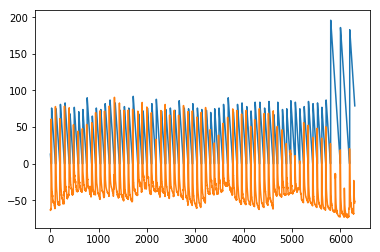

196


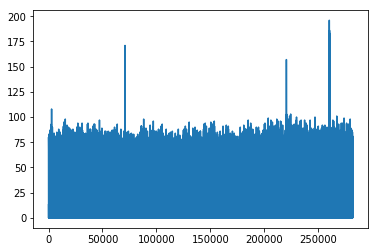

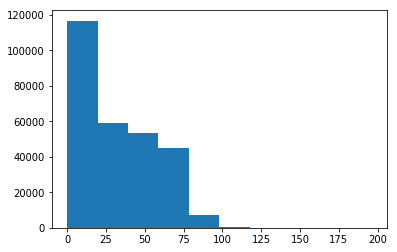

1.0
1.0


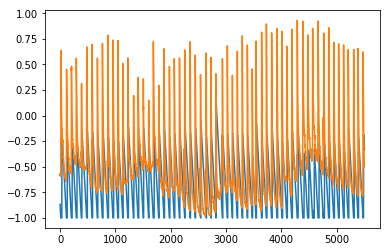

In [13]:
timing = []
i = 0
start = 0
for measurement in range(0, len(temp)):
    
    if temp[measurement] < -0.10:
        timing.append(i)
        i += 1

    else:
        i = 0
        timing.append(i)
        end = measurement
        timing[start:end] = np.max(timing[start:end])-timing[start:end]
        start = measurement

np.argmax(timing)
#plt.figure(figsize=(20,14))
plt.plot(timing[np.argmax(timing)-5800:np.argmax(timing)+500])
plt.plot(100*temp[np.argmax(timing)-5800:np.argmax(timing)+500])
plt.show()

print(np.max(timing))

#plt.figure(figsize=(20,14))
plt.plot(timing[:])
plt.show()

plt.hist(timing)
plt.show()
plt.figure(figsize=(6,4))


timing = np.divide(timing,np.max(timing))*2 - 1
print(np.max(timing))
print(np.max(temp))


plt.plot(timing[0:5500])
plt.plot(temp[0:5500])
plt.show()

(253774, 100)


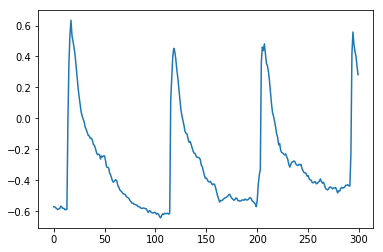

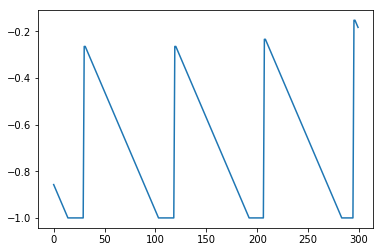

(253774, 100, 1)
(253774,)


In [121]:
val = 0.1
seq_len = 100

X, Y = create_dataset(temp[0:int(len(temp)-val*len(temp))], timing[0:int(len(timing)-val*len(timing))], seq_len)
X_val, Y_val = create_dataset(temp[int(len(temp)-val*len(temp)):-1], timing[int(len(timing)-val*len(timing)):-1], seq_len)

temp_val = temp[int(len(temp)-val*len(temp)):-1]

print(X.shape)
plt.plot(X[0:300,0])
plt.show()
plt.plot(Y[0:300])
plt.show()
X = X.reshape(X.shape[0], X.shape[1], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
Y = Y.reshape(Y.shape[0])

print(X.shape)
print(Y.shape)


In [122]:
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten

model = Sequential()

model.add(Conv1D(filters=4, kernel_size=4, activation='relu', input_shape=(np.shape(X)[1],np.shape(X)[2]), strides=4))
model.add(Conv1D(filters=4, kernel_size=4, activation='relu', input_shape=(np.shape(X)[1],np.shape(X)[2]), strides=4))
#model.add(Conv1D(filters=8, kernel_size=16, activation='relu', strides=4))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.sgd(),
              metrics=['mse'])



In [152]:
from keras.layers import Conv1D, Dense, MaxPooling1D, Flatten, LSTM, AveragePooling1D

model = Sequential()
#model.add(Conv1D(filters=8, kernel_size=4, activation='relu', input_shape=(np.shape(X)[1],np.shape(X)[2]), strides=3))
#model.add(AveragePooling1D(pool_size=2))
#model.add(Conv1D(filters=8, kernel_size=4, activation='relu', strides=3))
#model.add(Flatten())
model.add(LSTM(16, return_sequences=True, input_shape=(np.shape(X)[1],np.shape(X)[2]), activation='tanh'))
model.add(LSTM(16, activation='tanh'))
#model.add(Dense(8, activation='relu'))
#model.add(Dropout(0.5))
#model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))


model.compile(loss=keras.losses.mean_squared_error,
              optimizer=keras.optimizers.sgd(),
              metrics=['mse'])



Train on 253774 samples, validate on 28107 samples
Epoch 1/15
253774/253774 [==============================] - 91s 358us/step - loss: 0.0759 - mean_squared_error: 0.0759 - val_loss: 0.0868 - val_mean_squared_error: 0.0868
Epoch 2/15
253774/253774 [==============================] - 91s 357us/step - loss: 0.0655 - mean_squared_error: 0.0655 - val_loss: 0.0849 - val_mean_squared_error: 0.0849
Epoch 3/15
253774/253774 [==============================] - 90s 355us/step - loss: 0.0629 - mean_squared_error: 0.0629 - val_loss: 0.0808 - val_mean_squared_error: 0.0808
Epoch 4/15
253774/253774 [==============================] - 91s 357us/step - loss: 0.0534 - mean_squared_error: 0.0534 - val_loss: 0.0576 - val_mean_squared_error: 0.0576
Epoch 5/15
253774/253774 [==============================] - 91s 358us/step - loss: 

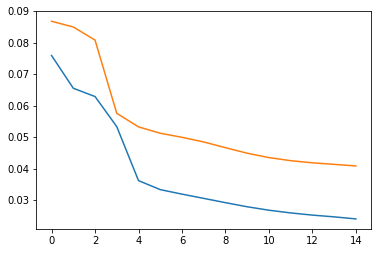

In [143]:
from keras.models import load_model

epochs = 15

#model = load_model('/Users/ckruse/Documents/python/oldFaithfulTemp.h5')
history = model.fit(X,
                    Y,
                    epochs=epochs,
                    validation_data = [X_val,Y_val],
                    verbose=1,
                    batch_size=256,
                    shuffle=False)

model.save('/Users/ckruse/Documents/python/oldFaithfulTemp.h5')
plt.plot(history.history['loss'])

plt.plot(history.history['val_loss'])
plt.show()

#score = model.evaluate(data_stack, label_stack, verbose=1)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])
#model.save('/Users/ckruse/Documents/python/soccer/model.h5')

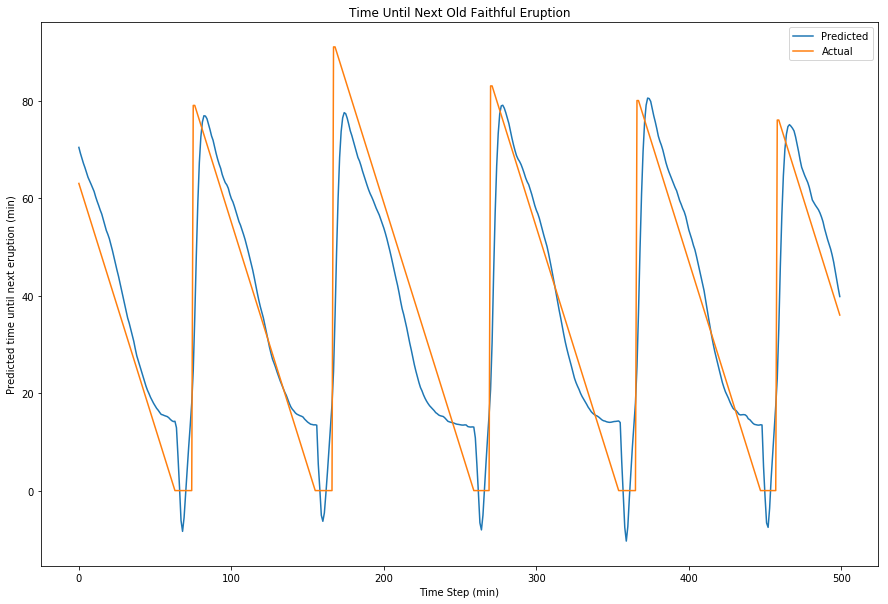

In [148]:
testPredict = model.predict(X_val)
testPredict = ((testPredict+1)/2)*196

trainPredict = model.predict(X[0:150])
trainPredict = ((trainPredict+1)/2)*196
normY = ((Y_val+1)/2)*196

plt.figure(figsize=(15,10))
plt.plot(testPredict[0:500,0])
plt.plot(normY[0:500])
plt.xlabel('Time Step (min)')
plt.ylabel('Predicted time until next eruption (min)')
plt.title('Time Until Next Old Faithful Eruption')
plt.legend(['Predicted', 'Actual'])
plt.show()


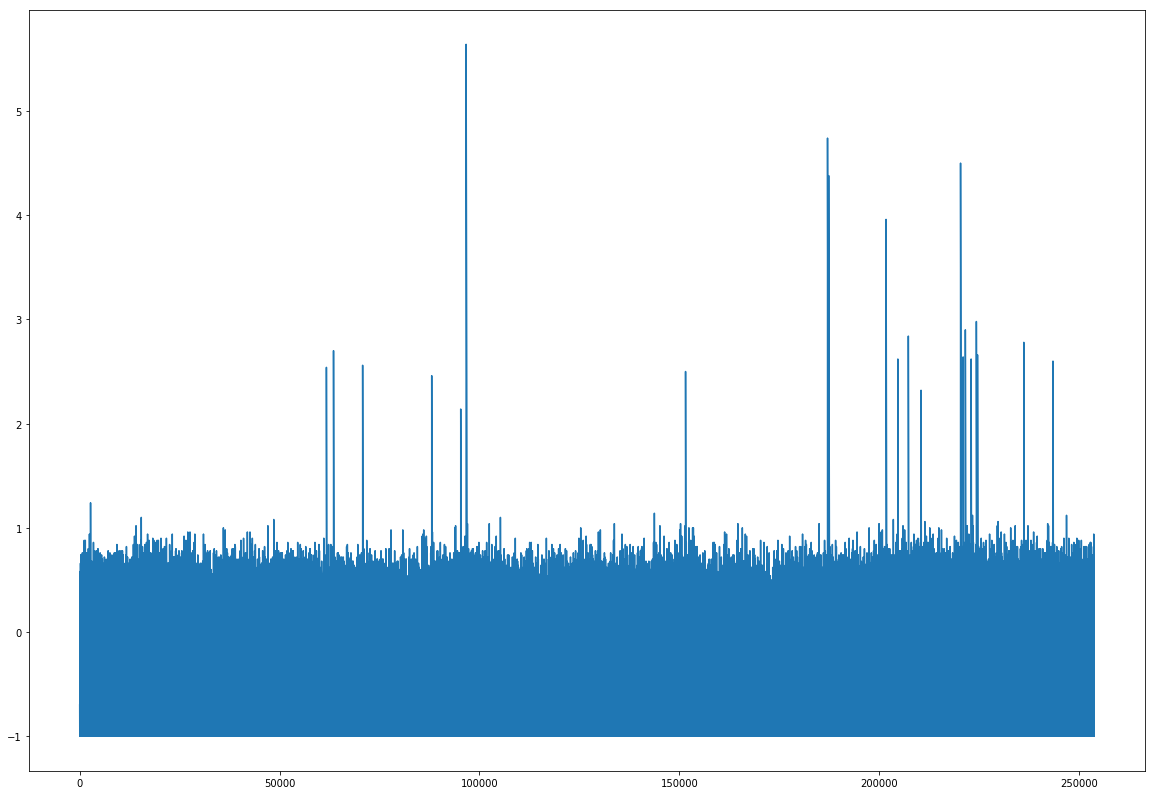

In [45]:

plt.figure(figsize=(10,7))
plt.plot(model.predict(X[0:1000])*100)
plt.plot(Y[0:1000]*100)
plt.show()

plt.figure(figsize=(10,7))
plt.plot(np.subtract(testPredict[0:1000,0],normY[0:1000]))
plt.show()

plt.figure(figsize=(10,7))
plt.plot(np.subtract(trainPredict[0:1000,0],((Y[0:1000]+1)/2)*196))
plt.show()

In [24]:
print(np.shape(X)[1])

260700


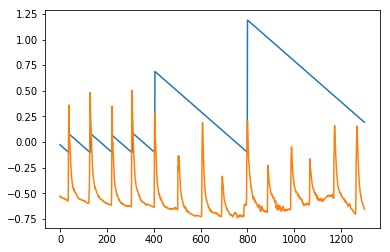

In [72]:
np.argmax(timing)
#plt.figure(figsize=(20,14))
plt.plot(timing[np.argmax(timing)-800:np.argmax(timing)+500]/10)

plt.plot(temp[np.argmax(timing)-800:np.argmax(timing)+500])
plt.show()

In [82]:
for i in range(0,300):
    print('Predicted:', int(((model.predict(X_val[i:i+1])+1)/2)*196), 'Delta:', int(((model.predict(X_val[i:i+1])+1)/2)*196 - ((Y_val[i:i+1]+1)/2)*196), 'Temperature:', int((temp_val[i]+1)/2*58))
    print()

Predicted: 62 Delta: 0 Temperature: 22

Predicted: 61 Delta: 0 Temperature: 22

Predicted: 61 Delta: 0 Temperature: 21

Predicted: 60 Delta: 0 Temperature: 21

Predicted: 62 Delta: 3 Temperature: 21

Predicted: 60 Delta: 2 Temperature: 20

Predicted: 60 Delta: 3 Temperature: 20

Predicted: 59 Delta: 3 Temperature: 20

Predicted: 56 Delta: 1 Temperature: 20

Predicted: 54 Delta: 0 Temperature: 20

Predicted: 53 Delta: 0 Temperature: 19

Predicted: 50 Delta: -1 Temperature: 19

Predicted: 50 Delta: 0 Temperature: 19

Predicted: 48 Delta: -1 Temperature: 19

Predicted: 46 Delta: -2 Temperature: 19

Predicted: 47 Delta: 0 Temperature: 19

Predicted: 43 Delta: -3 Temperature: 19

Predicted: 43 Delta: -2 Temperature: 18

Predicted: 43 Delta: -1 Temperature: 18

Predicted: 46 Delta: 2 Temperature: 18

Predicted: 47 Delta: 4 Temperature: 18

Predicted: 39 Delta: -2 Temperature: 18

Predicted: 38 Delta: -2 Temperature: 17

Predicted: 36 Delta: -3 Temperature: 17

Predicted: 36 Delta: -2 Tempera

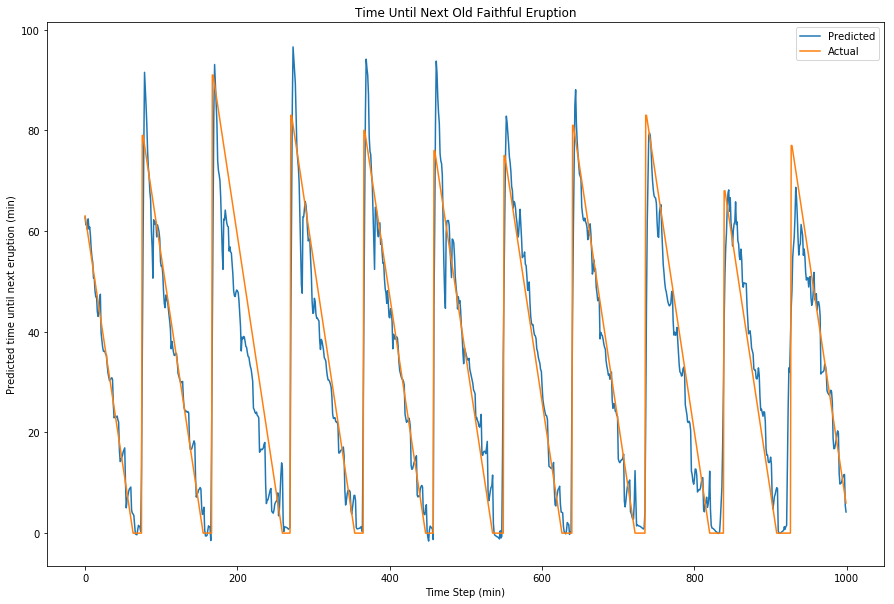

In [99]:
plt.figure(figsize=(15,10))
plt.plot(testPredict[0:1000,0])
plt.plot(normY[0:1000])
plt.xlabel('Time Step (min)')
plt.ylabel('Predicted time until next eruption (min)')
plt.title('Time Until Next Old Faithful Eruption')
plt.legend(['Predicted', 'Actual'])
plt.show()